
# Project: TMDB (Movies Database) Data Analysis.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> We will be investigating the TMDB data set for any sort of Trends, in particular, the best months for a movie release and best directors/actors and so on.

## Research Questions

#### 1. Which is/are the best month(s) to release a movie?
#### 2. Who is/are the best director(s)/actor(s)?
#### 3. How does the runtime of a movie affects the popularity?

In [2]:
# Import all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
# Load the information about the dataframe 
# to get the genral sense of what it looks like from the top
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Check to see what columns, if any, have the null values
df.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [6]:
# Load the stats about the data set
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 
> In this section we will perform the data cleaning i.e. dropping or filling the null values, formatting the data as needed etc.

In [7]:
# Drop the columns that are not required to
# answer the questions posed by the data set
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'production_companies'], axis=1, inplace=True)

In [8]:
#Drop the overview column
df.drop(['overview'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


### Filling the Zero values in  budget_adj, revenue_adj and runtime (with their corresponding means)

In [10]:
# Finding the mean for budget_adj

budget_adj_mean = df['budget_adj'].mean()
budget_adj_mean

17551039.82288678

In [11]:
#Filling all the zero values in the column with the mean

df['budget_adj'] = df['budget_adj'].replace(0, budget_adj_mean)

In [12]:
# Finding the mean for revenue_adj

revenue_adj_mean = df['revenue_adj'].mean()
revenue_adj_mean

51364363.253250986

In [13]:
#Filling all the zero values in the column with the mean

df['revenue_adj'] = df['revenue_adj'].replace(0, revenue_adj_mean)

In [14]:
# Finding the mean for runtime

runtime_mean = df['runtime'].mean()
runtime_mean

102.07086324314375

In [15]:
#Filling all the zero values in the column with the mean

df['runtime'] = df['runtime'].replace(0, runtime_mean)

### Change the required data types

In [16]:
# change the data type for release_date

df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

### Fill the null values to make the data set uniform

In [17]:
#Fill the null values

df[['cast', 'director', 'genres']] = df[['cast', 'director', 'genres']].fillna('Not Available')

In [18]:
#Check fot the data set's uniformity
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10866 non-null object
director          10866 non-null object
runtime           10866 non-null float64
genres            10866 non-null object
release_date      10866 non-null datetime64[ns]
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(5), object(4)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned the data, we're ready to move on to exploration. In this section we will compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f767d841940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f767d5beeb8>]], dtype=object)

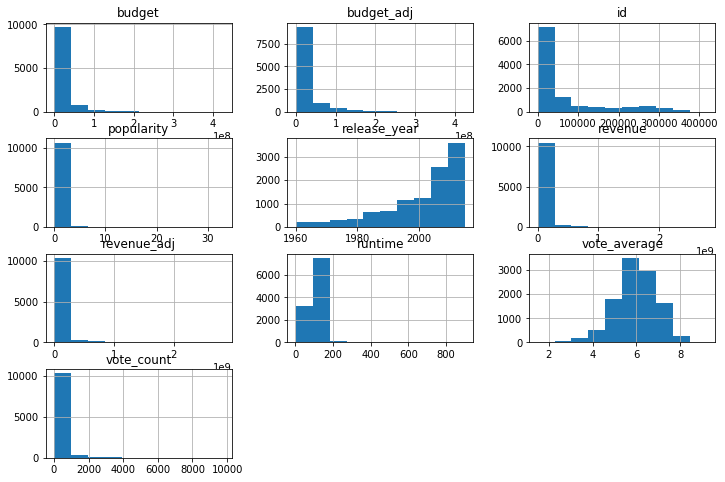

In [19]:
#Get the general sense of what the distribution of different columns looks like

df.hist(figsize=(12,8))

### Research Question 1 : What is/are the best month(s) to release a movie?

In [20]:
# Extract the month from the release_date

df['month'] = df['release_date'].dt.month
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4


In [21]:
#Group by month and add the revenue

revenue_by_month = df.groupby(['month'])['revenue_adj'].sum()
revenue_by_month

month
1     4.910687e+10
2     4.235442e+10
3     6.385822e+10
4     5.487055e+10
5     8.423232e+10
6     1.021322e+11
7     7.987658e+10
8     5.757434e+10
9     6.804293e+10
10    7.424615e+10
11    8.171477e+10
12    1.091239e+11
Name: revenue_adj, dtype: float64

Text(0.5,0,'Month')

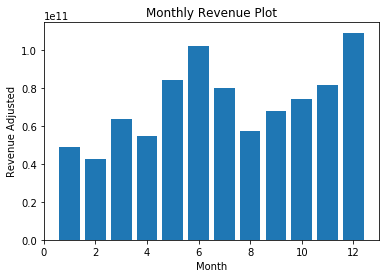

In [22]:
#Plot the findings

plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], revenue_by_month)
plt.title('Monthly Revenue Plot')
plt.ylabel('Revenue Adjusted')
plt.xlabel('Month')

We can clearly see from the plot above that the months 6(June) and 12(December) have gathered the most revenue

### Research Question 2: Which is/are the most successful director(s) / actors(s)?
#### 2A
>Best cast (actors) based on revenue collected by their movies

In [23]:
#split the cast seperated by |

#director_list = df['director'].str.cat(sep = '|')
#director_list = pd.Series(director_list.split('|'))
#director_list.drop_duplicates(keep='first', inplace=True)

cast_list = df['cast'].str.cat(sep = '|')
cast_list = pd.Series(cast_list.split('|'))
cast_list.drop_duplicates(keep='first', inplace=True)
cast_list


0                   Chris Pratt
1           Bryce Dallas Howard
2                   Irrfan Khan
3             Vincent D'Onofrio
4                 Nick Robinson
5                     Tom Hardy
6               Charlize Theron
7              Hugh Keays-Byrne
8                Nicholas Hoult
9                   Josh Helman
10             Shailene Woodley
11                   Theo James
12                 Kate Winslet
13                 Ansel Elgort
14                 Miles Teller
15                Harrison Ford
16                  Mark Hamill
17                Carrie Fisher
18                  Adam Driver
19                 Daisy Ridley
20                   Vin Diesel
21                  Paul Walker
22                Jason Statham
23           Michelle Rodriguez
24               Dwayne Johnson
25            Leonardo DiCaprio
27                 Will Poulter
28             Domhnall Gleeson
29                Paul Anderson
30        Arnold Schwarzenegger
                  ...          
52567   

In [24]:
# Group by the cast and find the total revenue
#count = director_list.value_counts(ascending = False)
#count
#Revenue_by_director = df.groupby(director_list)['revenue_adj'].sum()
Revenue_by_cast = df.groupby(cast_list)['revenue_adj'].sum()
Revenue_by_cast.head()

50 Cent         4.612510e+04
A Martinez      5.136436e+07
AJ Bowen        4.504077e+08
Aamir Khan      3.386112e+07
Aaron Abrams    8.049614e+07
Name: revenue_adj, dtype: float64

In [25]:
#Lets find the top 10 actors
Revenue_sorted = Revenue_by_cast.sort_values(ascending = False)
Rev_cast = Revenue_sorted.astype(int).head(10)
Rev_cast

Lee Pace             2827123750
Elijah Kelley        2789712242
Chandler Riggs       2506405735
Marlon Morton        2167324901
Vincent D'Onofrio    1902723129
Eugene Clark         1583049536
Georgia Goodrick     1574814739
Lara Rossi           1443191435
Chris Pratt          1392445892
Richard Winsor       1388863311
Name: revenue_adj, dtype: int64

([<matplotlib.axis.XTick at 0x7f767ca2e470>,
 <a list of 10 Text xticklabel objects>)

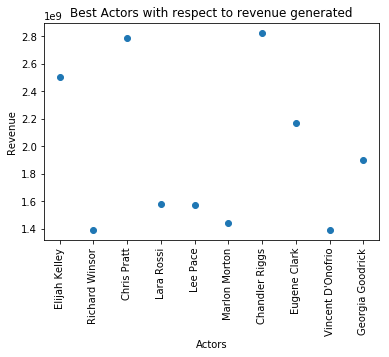

In [26]:
#Plot the results found above
plt.title('Best Actors with respect to revenue generated')
plt.xlabel('Actors')
plt.ylabel('Revenue')
x = Rev_cast.index
y = Rev_cast
plt.scatter(x,y)
plt.xticks(x, rotation='vertical')

In the plot above we have plotted the revenues for the top 10 actors and among them we can clearly see Chris Pratt and Chandler Riggs are the top actors. 

#### 2B
> Now we look for the best directors (w.r.t Revenue)

In [27]:
#split the directors seperated by |

director_list = df['director'].str.cat(sep = '|')
director_list = pd.Series(director_list.split('|'))
director_list.drop_duplicates(keep='first', inplace=True)

In [28]:
# Group by the directors and find the total revenue

Revenue_by_director = df.groupby(director_list)['revenue_adj'].sum()
Revenue_by_director.head()

 FrÃ©dÃ©ric Jardin    3.518942e+07
A. Todd Smith         1.687279e+07
A.R. Murugadoss       5.136436e+07
Aaron Aites           5.136436e+07
Aaron Blaise          6.982588e+07
Name: revenue_adj, dtype: float64

In [29]:
#Find the top 10

Directors_sorted = Revenue_by_director.sort_values(ascending = False)
Rev_Dir = Directors_sorted.astype(int).head(10)
Rev_Dir

Fatih Akin            2827123750
Jen McGowan           2789712242
Olaf Lubaszenko       1907005841
J.J. Abrams           1902723129
Noel Black            1791694309
Eldar Rapaport        1443191435
Colin Trevorrow       1392445892
David Webb Peoples    1388863311
James Wan             1385748801
Marisa Silver         1345551058
Name: revenue_adj, dtype: int64

([<matplotlib.axis.XTick at 0x7f767c98a4a8>,
 <a list of 10 Text xticklabel objects>)

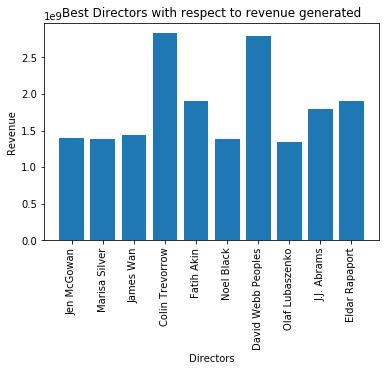

In [30]:
# Lets visualize the results found

plt.title('Best Directors with respect to revenue generated')
plt.xlabel('Directors')
plt.ylabel('Revenue')
x = Rev_Dir.index
y = Rev_Dir
plt.bar(x,y)
plt.xticks(x, rotation='vertical')

It's quite evident from the bar graph above that Colin Trevorrow and David Webb Peoples are the top two directors in regard to the revenue generated by the movies they direcetd.

### Research Question 3 : How does the runtime of a movie affects it's popularity?

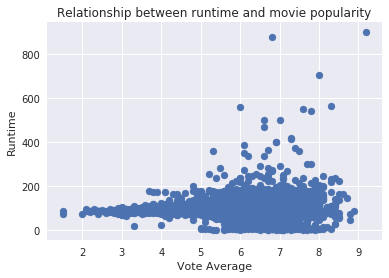

In [31]:
#We already have both the variable we need to plot, runtime and popularity aka vote average
#So we jump right to plotting

sns.set(style="darkgrid")
x = df['vote_average']
y = df['runtime']
plt.title('Relationship between runtime and movie popularity')
plt.xlabel('Vote Average')
plt.ylabel('Runtime')
plt.scatter(x,y)

<a id='conclusions'></a>
## Conclusions

> The research questions posed by the data set can help production companies and casting directors to better decide when to release the movie, what should be the approximate runtime of a movie for it to be more popular among the audiences and what directors and actors attracts more revenue.

> The best months to release the movies are July and December, probably due to vacations around that time.

> The best directors are  Colin Trevorrow and David Webb Peoples as their movies generated the highest revenue in our data set. The production companies can look a te=he sorted data set and can look for son top directors and actors i.e. who bring in more money.

> The movies around 10-20 minutes tend to have mid to high ratings. There is a big cluster around 100 minutes, so the movies of that length are somewhat unpredictable with their raings (low to high). Whereas the movies/shows with higher runtime tend to attract the mid to high ratings. 


### Limitations

> The vote average for the most movies(with a runtime of around 100 minutes) varied from low to high, so there was never any clear indication as to what is the trend followed by the movies of that runtime.

> The top directors and cast members could be from any era (might not even be currently active), so that won't be a major help for the casting directors or production companies.

> There are only a sample number of data points in our data set, so they might not very clearly represent the complete population of movies made till date.


In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'TMDB_Report.ipynb'])

0

### Resources:
>https://stackoverflow.com/questions/20937533/python-split-string-separated-by-a-pipe-symbol
>https://matplotlib.org/gallery/ticks_and_spines/ticklabels_rotation.html#sphx-glr-gallery-ticks-and-spines-ticklabels-rotation-py
>https://seaborn.pydata.org/examples/hexbin_marginals.html                                       
>https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column-python
>https://seaborn.pydata.org/ 

